In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [2]:
data = pd.read_csv('people_data.csv')
data = data[data.columns[data.columns != 'Unnamed: 0']]

In [3]:
data.head(5)

,unique_foods,input_number,avg_daily_food,avg_proportions_diff,Protein_positive_difference,Protein_negative_difference,Protein_none_difference,Calories_positive_difference,Calories_negative_difference,Calories_none_difference,...,Fiber_negative_difference,Fiber_none_difference,Protein_avg,Calories_avg,Sodium_avg,Sugar_avg,Fat_avg,Carbs_avg,Fiber_avg,dates_list
0,255,173,1.473988,443.271676,45,127,1,57,116,0,...,0,173,128.450867,2305.352601,2062.595376,81.606936,77.734104,184.537572,0.000000,"[""2014-09-15"", ""2014-09-16"", ""2014-09-17"", ""20..."
1,251,60,4.183333,190.550000,59,1,0,36,24,0,...,0,60,42.500000,1457.166667,1670.283333,76.216667,42.283333,181.200000,0.000000,"[""2015-01-12"", ""2015-01-13"", ""2015-01-14"", ""20..."
2,38,7,5.428571,718.571429,5,2,0,3,4,0,...,2,0,46.142857,1709.857143,1450.857143,0.000000,38.142857,115.857143,17.142857,"[""2014-09-14"", ""2014-09-15"", ""2014-09-16"", ""20..."
3,157,27,5.814815,72.481481,25,2,0,25,2,0,...,0,27,42.703704,912.444444,1483.740741,0.000000,37.074074,99.333333,0.000000,"[""2014-10-21"", ""2014-10-22"", ""2014-11-13"", ""20..."
4,245,179,1.368715,1549.659218,105,73,1,134,45,0,...,29,9,188.379888,2997.938547,2003.910615,121.268156,77.195531,0.000000,35.223464,"[""2014-09-14"", ""2014-09-15"", ""2014-09-16"", ""20..."


In [4]:
data.describe()

,unique_foods,input_number,avg_daily_food,avg_proportions_diff,Protein_positive_difference,Protein_negative_difference,Protein_none_difference,Calories_positive_difference,Calories_negative_difference,Calories_none_difference,...,Fiber_positive_difference,Fiber_negative_difference,Fiber_none_difference,Protein_avg,Calories_avg,Sodium_avg,Sugar_avg,Fat_avg,Carbs_avg,Fiber_avg
count,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,...,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000
mean,286.681993,59.335691,5.202374,172.582329,47.436742,10.675728,1.223222,46.259499,12.877627,0.198565,...,20.133892,3.999798,35.202001,64.574340,1314.682314,1268.971644,31.298231,46.689157,132.642764,6.102309
std,298.370319,54.571850,2.287778,3443.970487,46.110159,18.308679,8.822074,43.795030,21.017322,1.408801,...,39.927587,14.144394,48.936809,33.941369,5338.760788,9694.441291,98.284859,29.028830,476.762583,31.467629
min,1.000000,1.000000,0.061224,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,65.000000,13.000000,3.666667,48.695833,10.000000,0.000000,0.000000,11.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,45.250000,980.936785,0.000000,0.000000,32.508222,90.000000,0.000000
50%,190.500000,42.000000,4.926972,80.617819,32.000000,3.000000,0.000000,32.000000,4.000000,0.000000,...,0.000000,0.000000,9.000000,60.000000,1235.774849,1245.392857,29.154014,44.731238,127.341061,0.000000
75%,410.000000,92.000000,6.359022,134.026817,74.000000,13.000000,1.000000,70.000000,16.000000,0.000000,...,19.000000,0.000000,54.000000,78.350909,1500.133041,1915.116205,49.166667,58.086413,162.077197,11.501404
max,2938.000000,187.000000,30.000000,342000.000000,180.000000,182.000000,180.000000,186.000000,162.000000,64.000000,...,185.000000,179.000000,186.000000,875.837838,530000.000000,960000.000000,9000.000000,1605.552941,47000.000000,3000.000000


In [5]:
def boxplots(data):
    fig, axes = plt.subplots(4, 8, figsize=(20, 20))
    i = 0
    j = 0
    for feature in data.columns.values:
        sns.boxplot(ax=axes[i, j], x=data[feature])
        if j == 7:
            j = 0
            i += 1
        else:
            j += 1

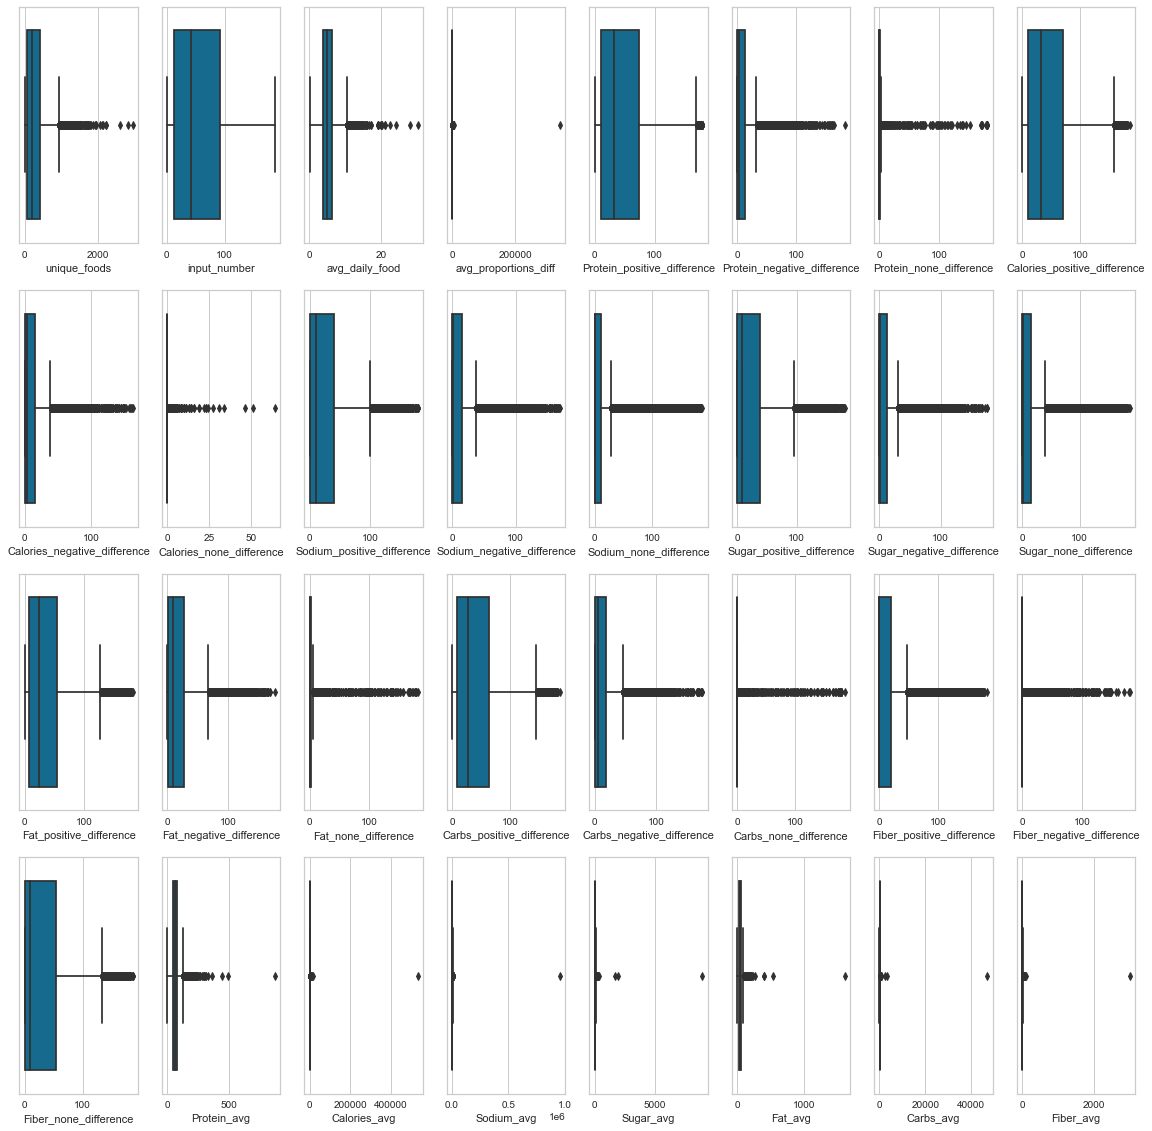

In [6]:
boxplots(data.iloc[:, :-1])

In [7]:
dic = {'unique_foods' : 2500, 'avg_daily_food' : 20, 'avg_proportions_diff' : 1000, 'Protein_avg' : 150, 
       'Calories_avg' : 8000, 'Sodium_avg' : 4800, 'Sugar_avg' : 1000, 'Fat_avg': 250, 'Carbs_avg' : 400,  'Fiber_avg' : 50}

In [8]:
for column in data.columns.values:
    if column not in dic:
        continue
    df = data.loc[:, [column]]
    for i in df.index:
        if df.iloc[i, 0] >= dic[column]:
            data.loc[i, [column]] = data[column].median()

In [9]:
data.describe()

,unique_foods,input_number,avg_daily_food,avg_proportions_diff,Protein_positive_difference,Protein_negative_difference,Protein_none_difference,Calories_positive_difference,Calories_negative_difference,Calories_none_difference,...,Fiber_positive_difference,Fiber_negative_difference,Fiber_none_difference,Protein_avg,Calories_avg,Sodium_avg,Sugar_avg,Fat_avg,Carbs_avg,Fiber_avg
count,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,...,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000
mean,285.898936,59.335691,5.182932,120.055106,47.436742,10.675728,1.223222,46.259499,12.877627,0.198565,...,20.133892,3.999798,35.202001,61.930009,1257.572352,1162.888952,30.022813,46.387352,126.714182,5.715616
std,295.204716,54.571850,2.211731,134.520392,46.110159,18.308679,8.822074,43.795030,21.017322,1.408801,...,39.927587,14.144394,48.936809,27.063410,454.773029,1012.905195,29.229662,23.292256,58.298800,8.920455
min,1.000000,1.000000,0.061224,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,65.000000,13.000000,3.666667,48.695833,10.000000,0.000000,0.000000,11.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,45.250000,980.936785,0.000000,0.000000,32.508222,90.000000,0.000000
50%,190.062500,42.000000,4.925374,80.615385,32.000000,3.000000,0.000000,32.000000,4.000000,0.000000,...,0.000000,0.000000,9.000000,60.000000,1235.680958,1245.285714,29.149571,44.730784,127.340659,0.000000
75%,409.000000,92.000000,6.347161,131.000000,74.000000,13.000000,1.000000,70.000000,16.000000,0.000000,...,19.000000,0.000000,54.000000,76.338539,1499.849580,1907.065312,49.140397,58.064732,161.636364,11.455492
max,2227.000000,187.000000,19.000000,998.735294,180.000000,182.000000,180.000000,186.000000,162.000000,64.000000,...,185.000000,179.000000,186.000000,149.869863,5925.988950,4784.782123,335.111111,231.000000,389.000000,49.977778


In [10]:
dates = data.iloc[:, -1:]
data = data.iloc[:, :-1]
data = data / data.max()
initial_data = data.copy()
data = data.iloc[:, :25]

In [11]:
data.head()

,unique_foods,input_number,avg_daily_food,avg_proportions_diff,Protein_positive_difference,Protein_negative_difference,Protein_none_difference,Calories_positive_difference,Calories_negative_difference,Calories_none_difference,...,Sugar_none_difference,Fat_positive_difference,Fat_negative_difference,Fat_none_difference,Carbs_positive_difference,Carbs_negative_difference,Carbs_none_difference,Fiber_positive_difference,Fiber_negative_difference,Fiber_none_difference
0,0.114504,0.925134,0.077578,0.443833,0.250000,0.697802,0.005556,0.306452,0.716049,0.0,...,0.010695,0.370166,0.587571,0.010989,0.854839,0.079545,0.000000,0.000000,0.000000,0.930108
1,0.112708,0.320856,0.220175,0.190791,0.327778,0.005495,0.000000,0.193548,0.148148,0.0,...,0.005348,0.237569,0.090395,0.005495,0.204301,0.119318,0.005376,0.000000,0.000000,0.322581
2,0.017063,0.037433,0.285714,0.719481,0.027778,0.010989,0.000000,0.016129,0.024691,0.0,...,0.037433,0.027624,0.011299,0.000000,0.032258,0.005682,0.000000,0.027027,0.011173,0.000000
3,0.070498,0.144385,0.306043,0.072573,0.138889,0.010989,0.000000,0.134409,0.012346,0.0,...,0.144385,0.132597,0.016949,0.000000,0.139785,0.005682,0.000000,0.000000,0.000000,0.145161
4,0.110013,0.957219,0.072038,0.080720,0.583333,0.401099,0.005556,0.720430,0.277778,0.0,...,0.005348,0.674033,0.316384,0.005495,0.000000,0.000000,0.962366,0.762162,0.162011,0.048387


In [12]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [13]:
hopkins(data)

0.9290231991946208

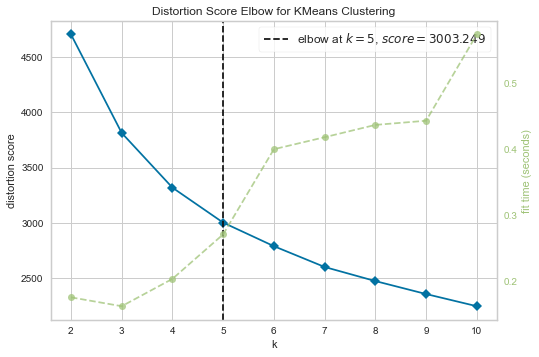

In [14]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=10)
visualizer.fit(data)
visualizer.show()

In [15]:
km = KMeans(n_clusters = 5, random_state=1234)
y = km.fit_predict(data)

clusters = [[] for _ in range(5)]
for indx, cluster in enumerate(y):
    clusters[cluster].append(indx)

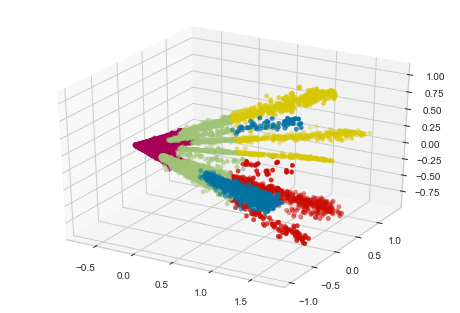

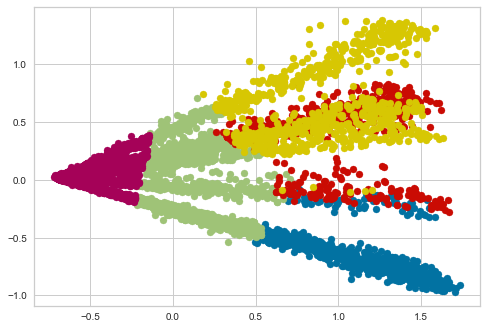

In [16]:
from sklearn.decomposition import PCA
def plot(X, clusters, dimension):
    if dimension == 3:
        ax = plt.figure().gca(projection='3d')
    else:
        ax = plt.figure().gca()
    for i, index in enumerate(clusters):
        point = X[index].T
        ax.scatter(*point)
    plt.show()
    
pca = PCA(n_components=3)
pca_components = pd.DataFrame(pca.fit_transform(data))
plot(np.asarray(pca_components), clusters, 3)

pca = PCA(n_components=2)
pca_components = pd.DataFrame(pca.fit_transform(data))
plot(np.asarray(pca_components), clusters, 2)

In [17]:
data['clusters'] = 0
for i in range(len(clusters)):
    data.loc[clusters[i], ['clusters']] = i

In [18]:
for i in range(len(clusters)):
    print("cluster ", i, len(clusters[i]))

cluster  0 939
cluster  1 2665
cluster  2 589
cluster  3 4919
cluster  4 784


In [19]:
def draw_clusters(data):
    columns = data.columns.values
    for column in columns:
        plt.figure(figsize=(10,4))
        sns.stripplot(data=data, x='clusters', y=column, hue='clusters')
        # violinplot, barplot, stripplot 

<ipython-input-19-b0aa90144700>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,4))


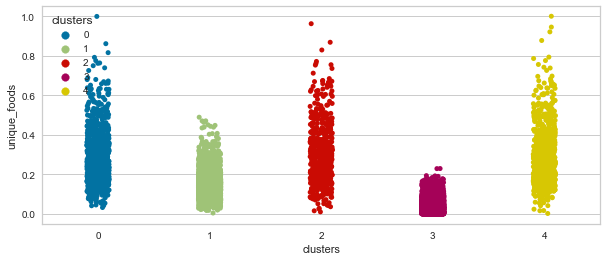

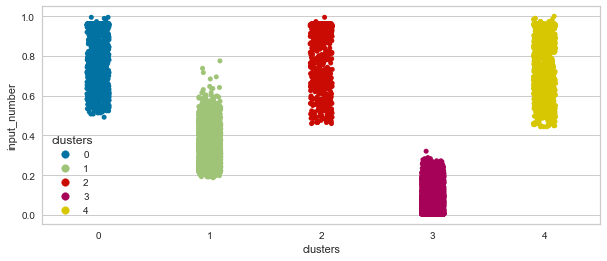

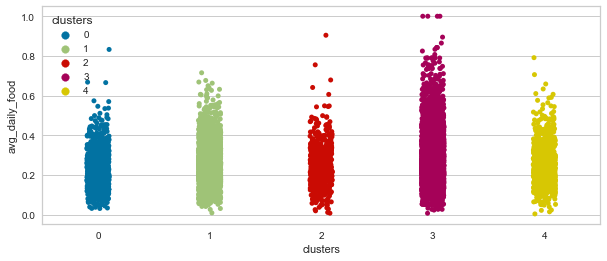

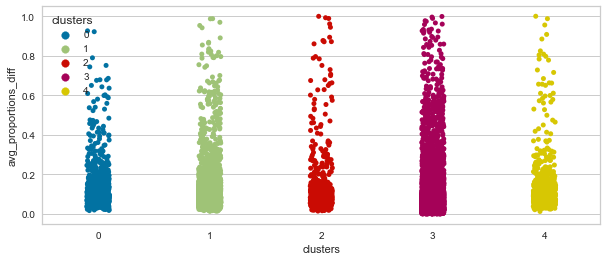

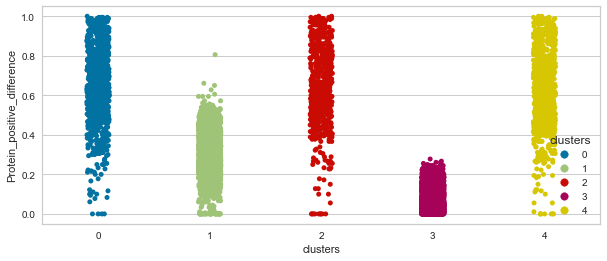

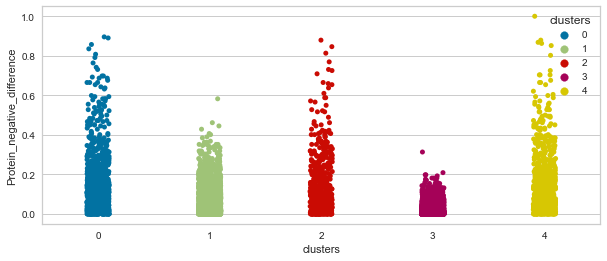

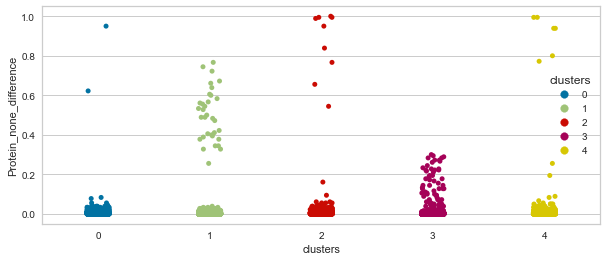

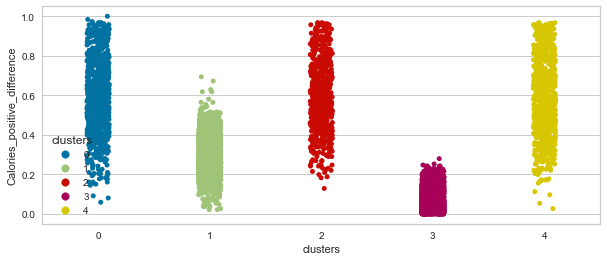

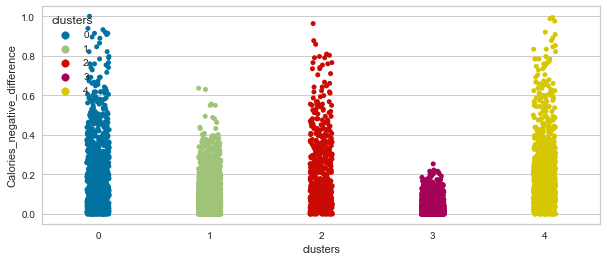

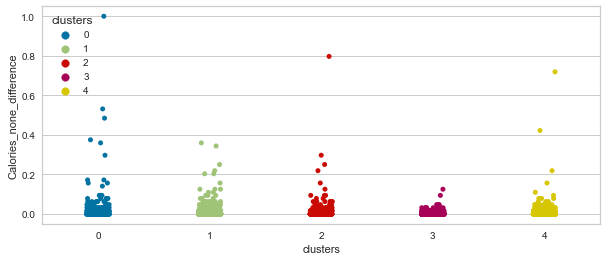

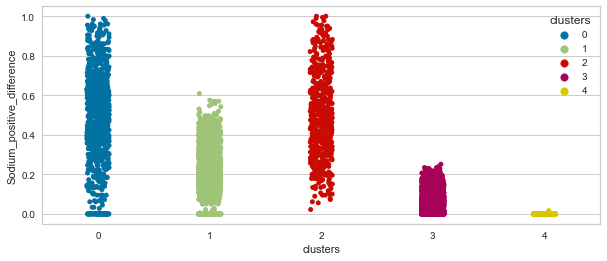

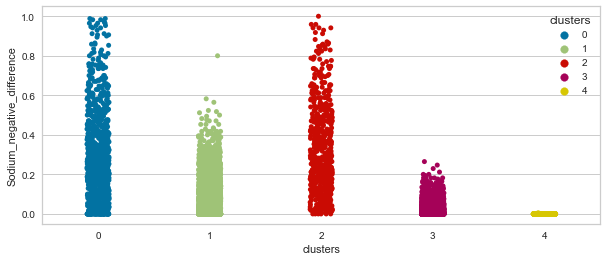

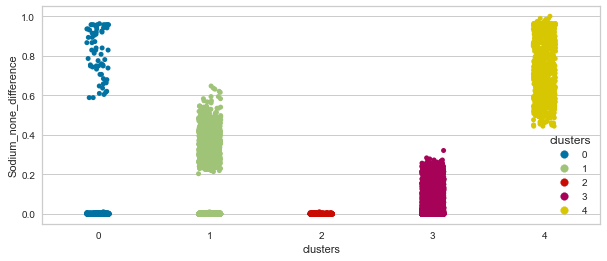

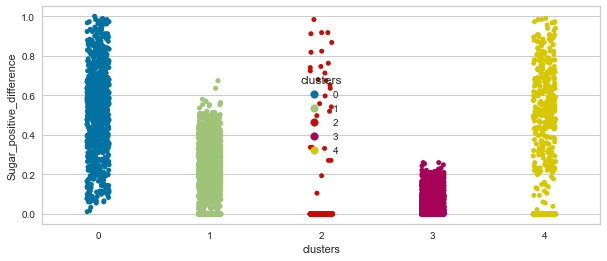

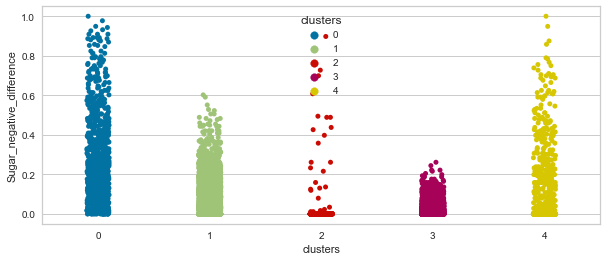

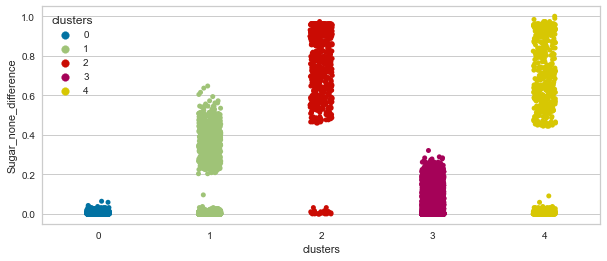

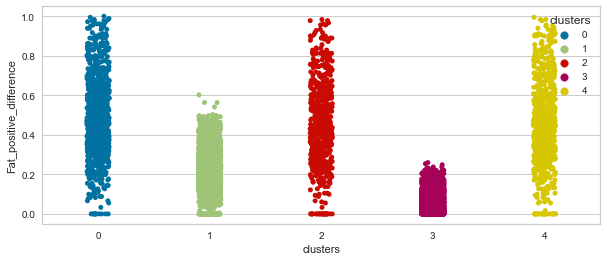

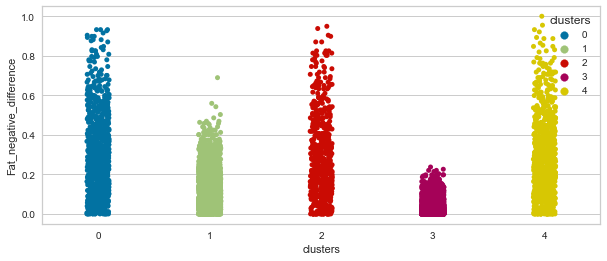

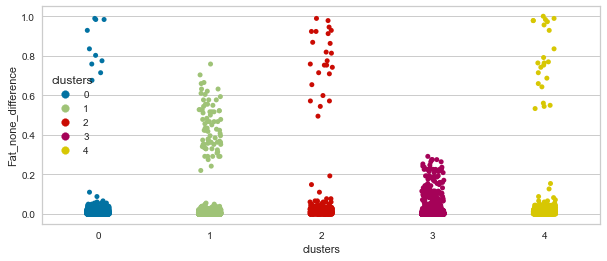

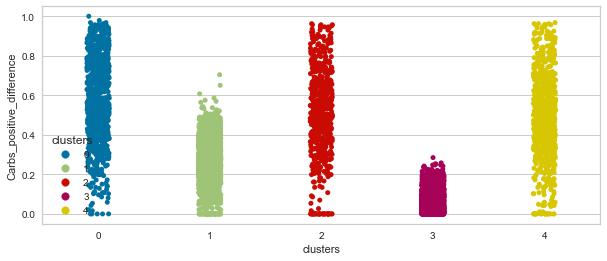

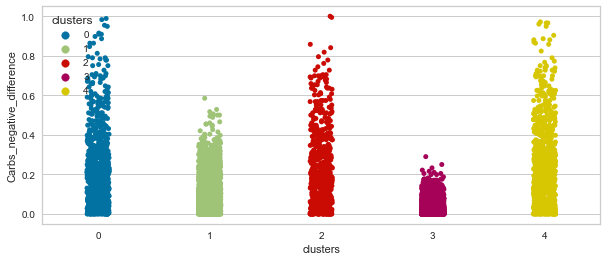

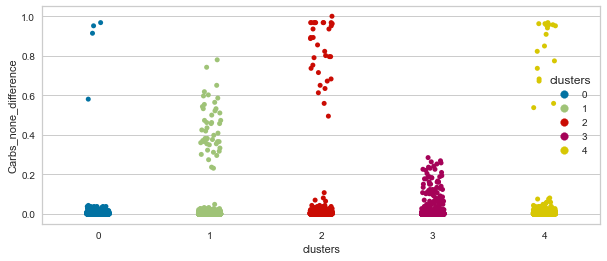

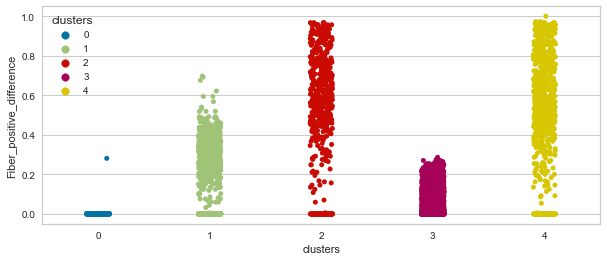

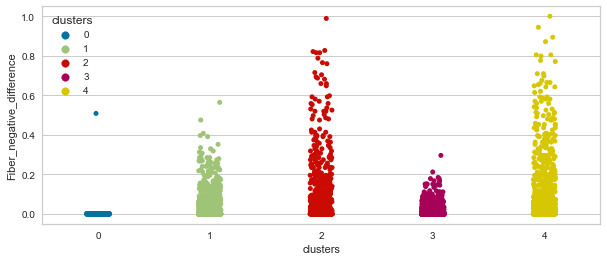

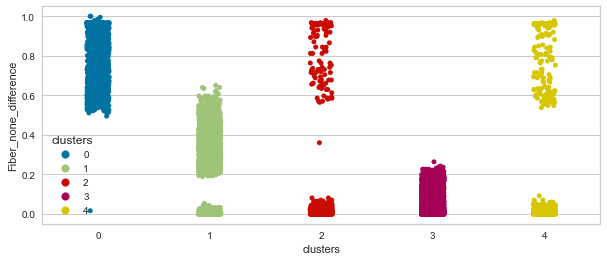

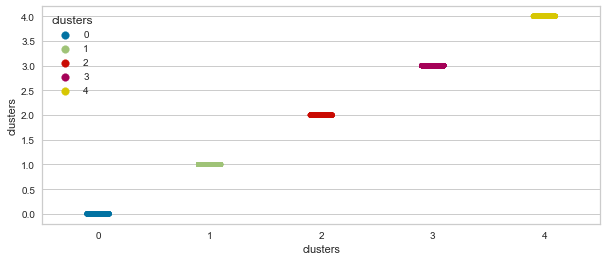

In [20]:
draw_clusters(data)

In [21]:
reporting_data = initial_data.iloc[:, 25:]
reporting_data['clusters'] = 0
for i in range(len(clusters)):
    reporting_data.loc[clusters[i], ['clusters']] = i

<ipython-input-21-4f9775bca40d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reporting_data['clusters'] = 0
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


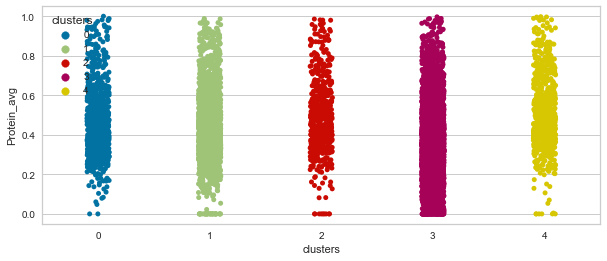

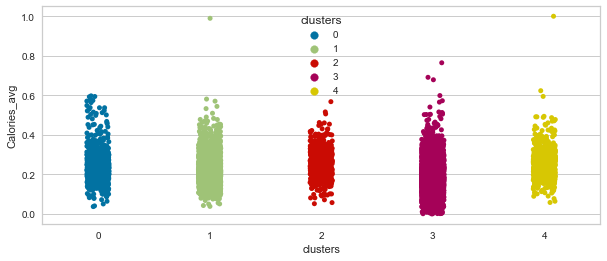

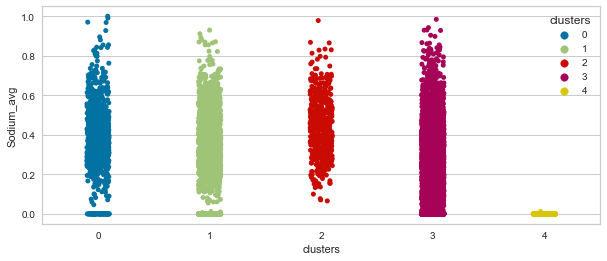

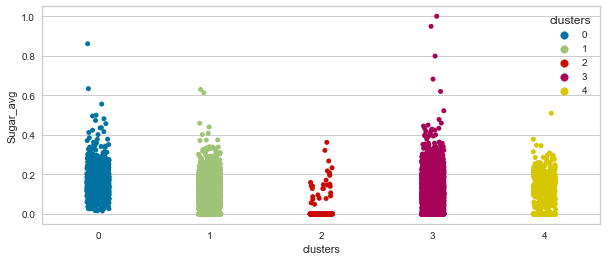

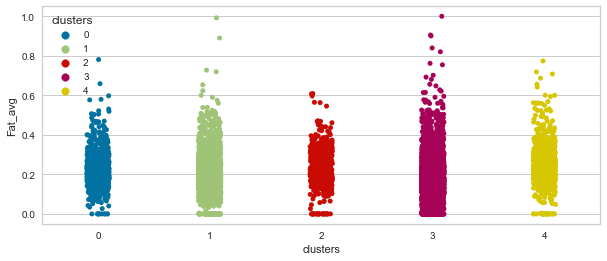

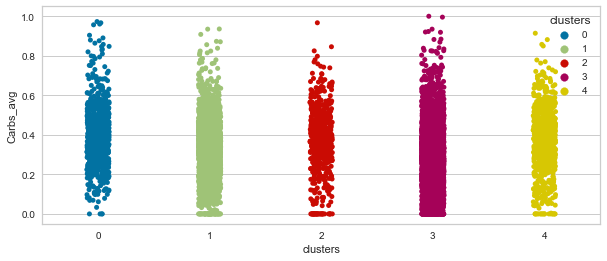

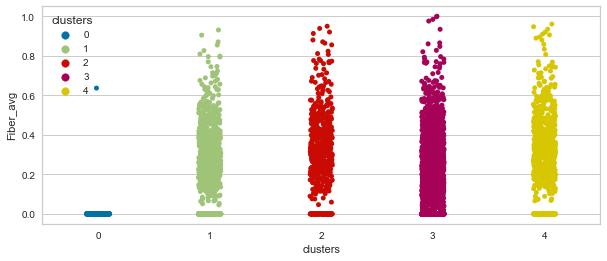

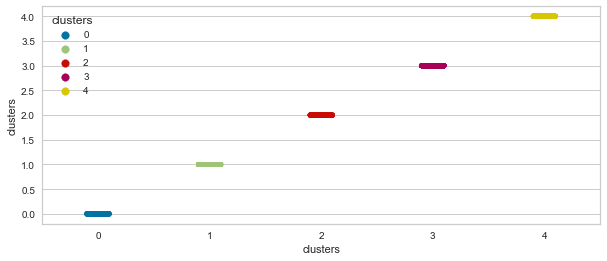

In [22]:
draw_clusters(reporting_data)

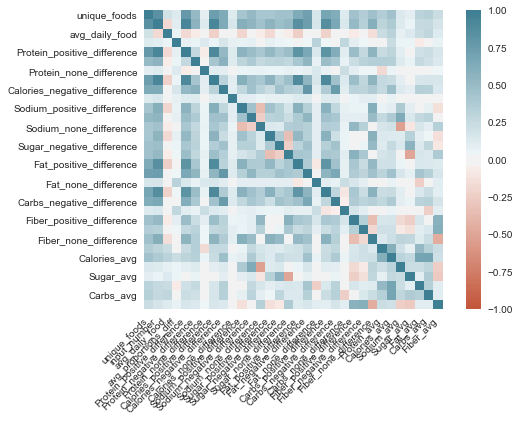

In [23]:
corr = initial_data.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

In [24]:
daysta = pd.read_csv('daily_data.csv')
daysta = daysta[daysta.columns[daysta.columns != 'Unnamed: 0']]
numerical_daysta = daysta[daysta.columns[daysta.columns != 'unique_dates']]
daysta.set_index(['unique_dates'])
daysta.head(5)

,unique_dates,unique_users,unique_meals,Protein_average_sum,Calories_average_sum,Sodium_average_sum,Sugar_average_sum,Fat_average_sum,Carbs_average_sum,Fiber_average_sum,Protein_average_dif,Calories_average_dif,Sodium_average_dif,Sugar_average_dif,Fat_average_dif,Carbs_average_dif,Fiber_average_dif
0,2014-09-14,56,58,6.245841,136.231054,215.721612,6.989051,5.641176,13.127119,1.345013,58.267857,693.482143,676.178571,21.946429,26.785714,87.678571,10.142857
1,2014-09-15,280,223,6.949937,126.001244,181.622967,5.273216,4.787349,12.824839,1.381949,51.350000,596.467857,651.171429,25.589286,26.821429,79.975000,7.239286
2,2014-09-16,279,246,7.175121,128.075840,183.375952,4.897581,4.616700,13.330020,1.502986,47.451613,553.010753,644.118280,22.254480,23.992832,75.258065,6.917563
3,2014-09-17,274,253,7.279987,132.674687,185.938706,4.899329,4.967643,13.420027,1.529973,50.481752,550.788321,648.401460,22.259124,25.536496,71.854015,7.737226
4,2014-09-18,382,328,6.989593,127.458098,183.888365,4.790323,4.833859,13.187240,1.643258,47.141361,519.246073,640.293194,19.709424,24.845550,69.243455,7.638743


In [25]:
numerical_daysta.describe()

,unique_users,unique_meals,Protein_average_sum,Calories_average_sum,Sodium_average_sum,Sugar_average_sum,Fat_average_sum,Carbs_average_sum,Fiber_average_sum,Protein_average_dif,Calories_average_dif,Sodium_average_dif,Sugar_average_dif,Fat_average_dif,Carbs_average_dif,Fiber_average_dif
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,2823.009615,1381.745192,6.781283,130.135576,181.684028,4.751788,4.942420,13.319146,1.523824,50.646341,565.048916,724.280419,21.342681,25.386321,76.977800,6.767068
std,1105.981528,486.888045,0.291943,10.163654,12.463006,0.417965,0.543150,0.769345,0.087888,7.259820,66.284413,55.712396,3.391589,4.556499,11.063870,0.800513
min,17.000000,15.000000,6.245841,103.679487,127.396694,3.925926,2.794872,10.801282,1.345013,43.453844,491.709278,640.293194,18.529412,22.262578,68.661504,5.659091
25%,2162.000000,1107.750000,6.653459,122.723817,172.754553,4.595588,4.615498,12.815120,1.481809,47.045039,523.712028,686.905871,19.946431,23.439186,71.187718,6.286906
50%,2911.000000,1440.000000,6.738386,128.088385,180.628239,4.713085,4.803605,13.175496,1.519664,48.973714,548.922023,711.340450,20.755914,24.218992,74.243684,6.645741
75%,3659.250000,1707.500000,6.863871,136.332791,188.948178,4.837516,5.263893,13.780614,1.542557,52.138481,585.701890,750.226245,21.902209,25.998524,78.833625,7.144929
max,4531.000000,2128.000000,9.927290,199.154111,250.253333,9.610866,9.126229,18.025658,2.274081,119.001695,1032.202398,1097.682515,57.772016,61.545134,179.788701,11.675184


In [26]:
def boxplots_daysta(numerical_daysta):
    fig, axes = plt.subplots(8, 2, figsize=(20, 30))
    i = 0
    j = 0
    for feature in numerical_daysta.columns.values:
        sns.boxplot(ax=axes[i, j], x=numerical_daysta[feature])
        if j == 1:
            j = 0
            i += 1
        else:
            j += 1

In [27]:
def get_right(daysta, column):
    return boxplot_stats(daysta[column]).pop(0)['fliers'].min()

In [28]:
from matplotlib.cbook import boxplot_stats  
dic_less = {'unique_meals' : 250, 'Protein_average_sum' : 6.5, 'Sodium_average_sum' : 158, 'Fat_average_sum'
           :4, 'Carbs_average_sum' : 11.5,'Fiber_average_sum':1.4,  }
dic_more = {'Protein_average_sum' : 7.25, 'Calories_average_sum' : 158, 'Sodium_average_sum' : 218, 
           'Sugar_average_sum' : 5.3, 'Fat_average_sum' : 6, 'Carbs_average_sum' : 15, 'Fiber_average_sum':
           1.65, 'Protein_average_dif' : 60, 
            'Calories_average_dif' : get_right(daysta, 'Calories_average_dif'), 
            'Sodium_average_dif' : get_right(daysta, 'Sodium_average_dif'), 
            'Sugar_average_dif' : get_right(daysta, 'Sugar_average_dif'), 'Fat_average_dif' : get_right(daysta, 'Fat_average_dif'),
            'Carbs_average_dif' : get_right(daysta, 'Carbs_average_dif'), 'Fiber_average_dif' : get_right(daysta, 'Fiber_average_dif')
           }

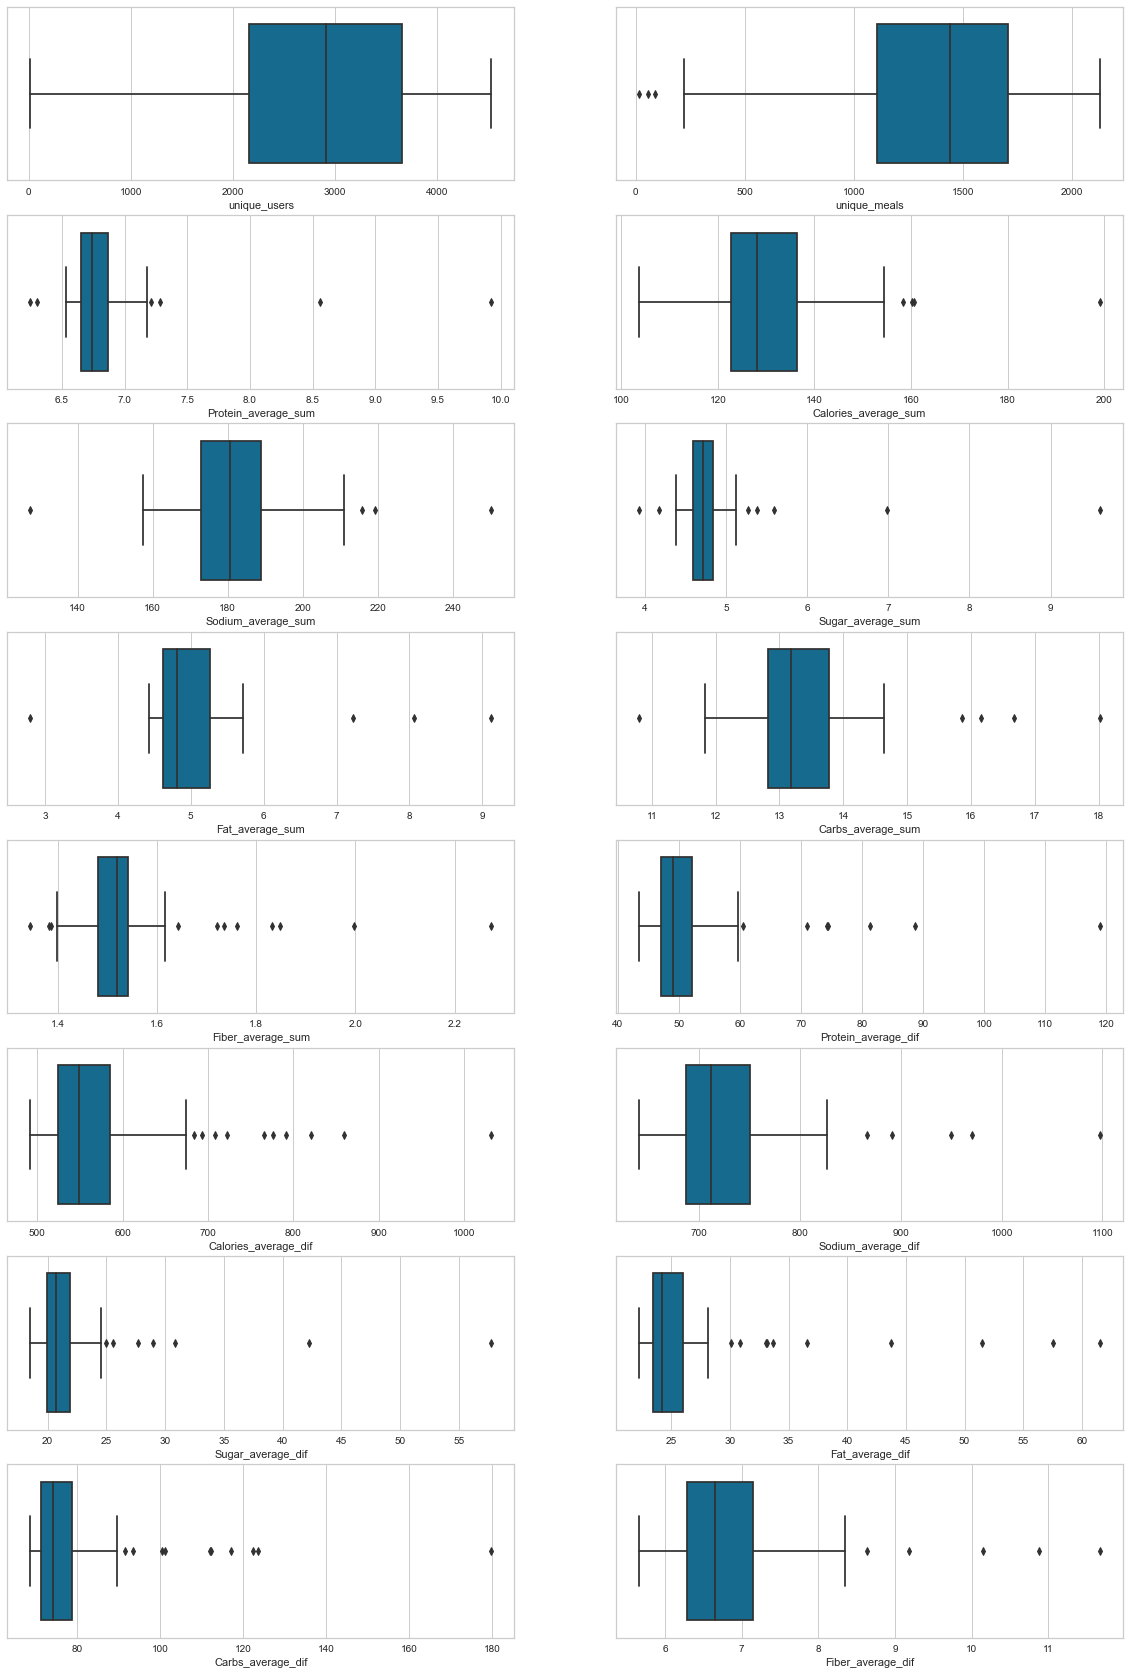

In [29]:
boxplots_daysta(numerical_daysta)

In [30]:
for column in numerical_daysta.columns.values:
    df = numerical_daysta.loc[:, [column]]
    if column in dic_more:
        for i in df.index:
            if df.iloc[i, 0] >= dic_more[column]:
                numerical_daysta.loc[i, [column]] = numerical_daysta[column].median()
    if column in dic_less:
        for i in df.index:
            if df.iloc[i, 0] <= dic_less[column]:
                numerical_daysta.loc[i, [column]] = numerical_daysta[column].median()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [31]:
numerical_daysta /= numerical_daysta.max()

In [32]:
hopkins(numerical_daysta)

0.7955576815198773

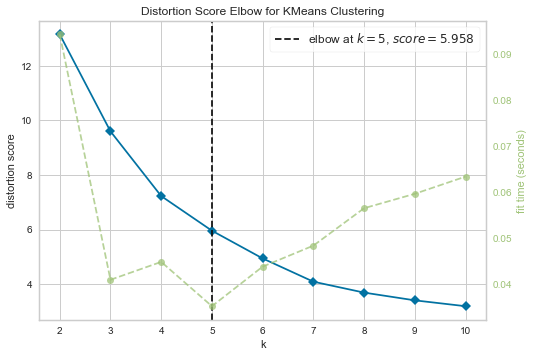

In [33]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=10)
visualizer.fit(numerical_daysta)
visualizer.show()

In [34]:
km = KMeans(n_clusters = 5, random_state=1234)
y = km.fit_predict(numerical_daysta)

clusters_daysta = [[] for _ in range(5)]
for indx, cluster in enumerate(y):
    clusters_daysta[cluster].append(indx)

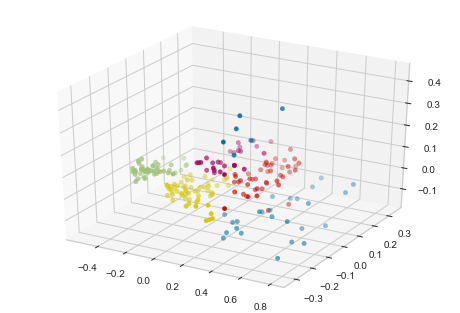

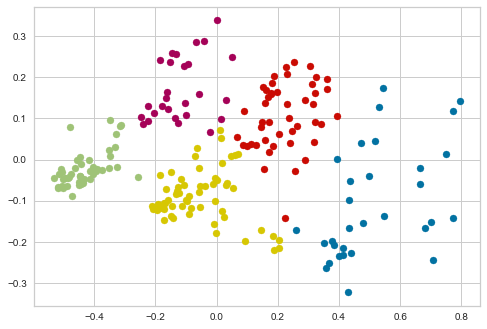

In [35]:
pca = PCA(n_components=3)
pca_components = pd.DataFrame(pca.fit_transform(numerical_daysta))
plot(np.asarray(pca_components), clusters_daysta, 3)

pca = PCA(n_components=2)
pca_components = pd.DataFrame(pca.fit_transform(numerical_daysta))
plot(np.asarray(pca_components), clusters_daysta, 2)

In [36]:
daysta['clusters'] = 0
for i in range(len(clusters_daysta)):
    daysta.loc[clusters_daysta[i], ['clusters']] = i

In [37]:
def draw_clusters_daysta(daysta):
    columns = daysta.columns.values
    for column in columns:
        if column == 'unique_dates':
            continue
        plt.figure(figsize=(10,4))
        sns.stripplot(data=daysta, x='clusters', y=column, hue='clusters')
        # violinplot, barplot, stripplot 

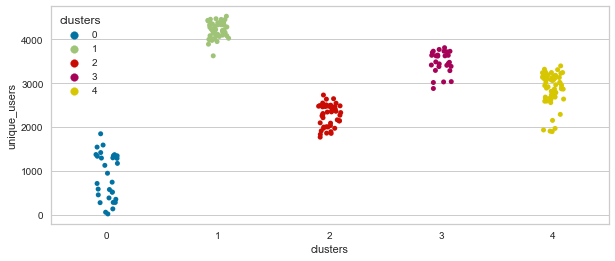

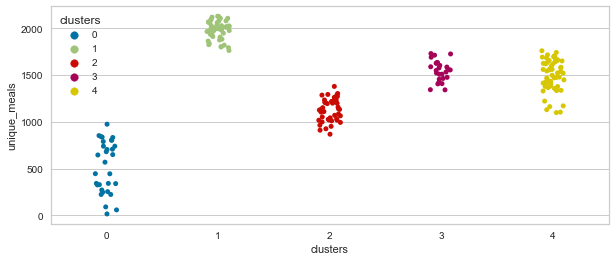

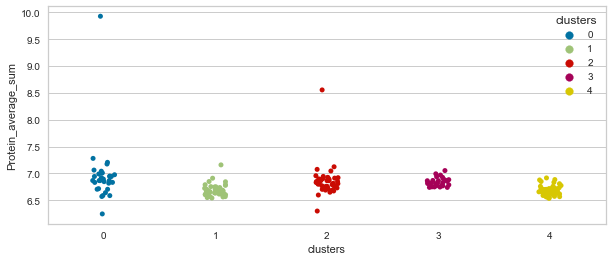

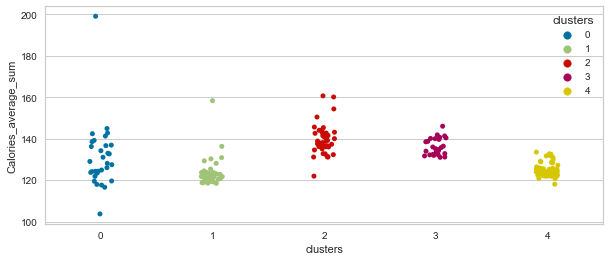

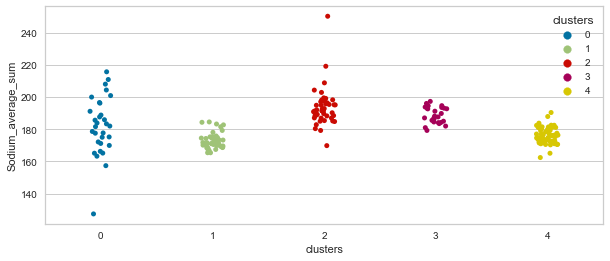

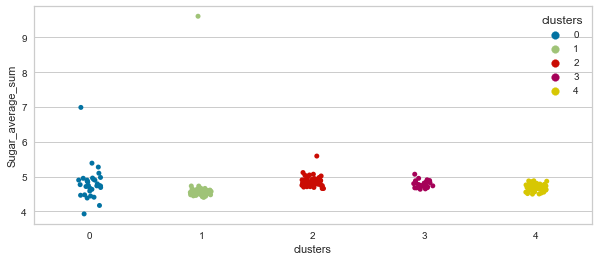

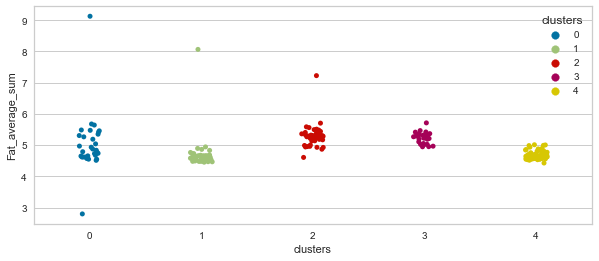

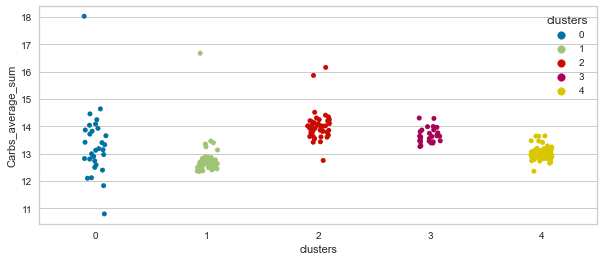

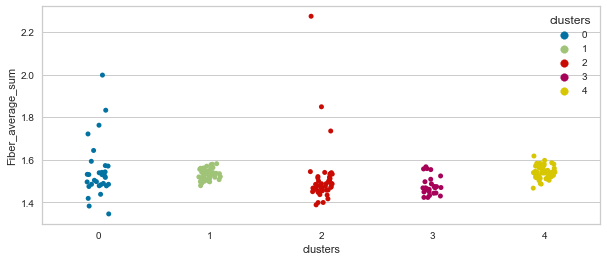

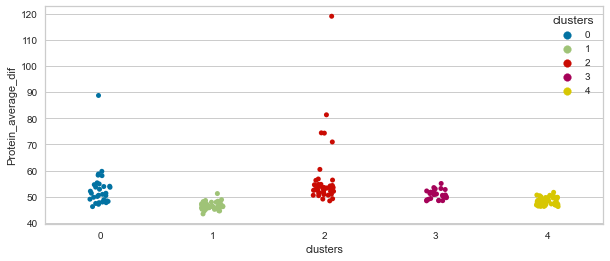

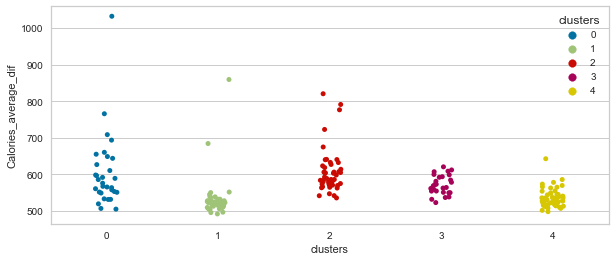

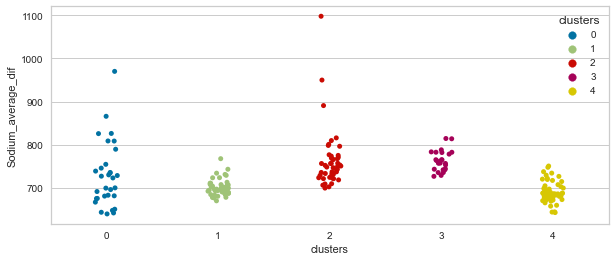

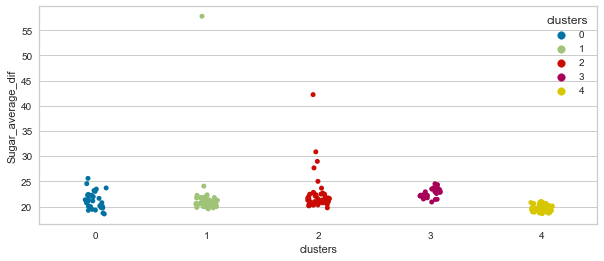

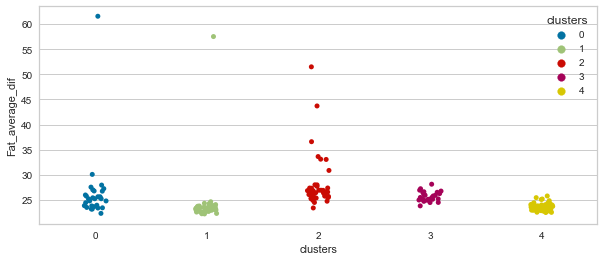

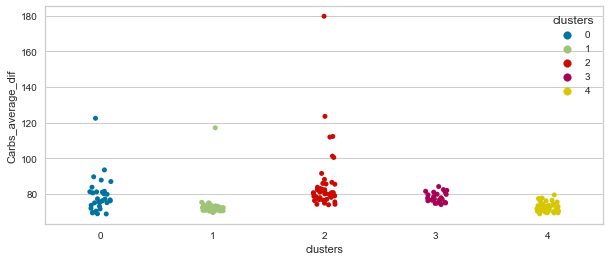

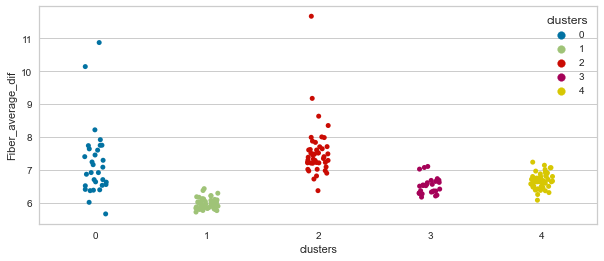

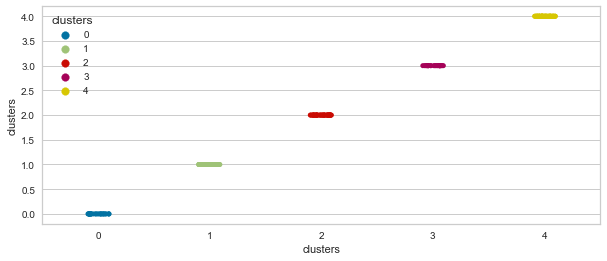

In [38]:
draw_clusters_daysta(daysta)

No handles with labels found to put in legend.


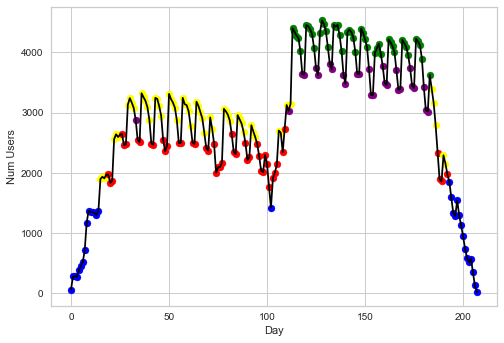

In [39]:
blu = daysta['unique_users']
cur_cluster = daysta['clusters']
plt.plot([i for i in range(0, 208)], blu, color='black')
for i in range(0, 208):
    if cur_cluster[i] == 0:
        plt.scatter([i], [blu[i]], color='blue')
    elif cur_cluster[i] == 1:
        plt.scatter([i], [blu[i]], color='green')
    elif cur_cluster[i] == 2:
        plt.scatter([i], [blu[i]], color='red')
    elif cur_cluster[i] == 3:
        plt.scatter([i], [blu[i]], color='purple')
    else:
        plt.scatter([i], [blu[i]], color='yellow')
plt.ylabel('Num Users')
plt.xlabel('Day')
plt.legend()
plt.show()

In [40]:
#გამოცდილი და გამოუცდელი იუზერების რაოდენობები გამოვიყენოთ რეპორტინგ ცვლადად

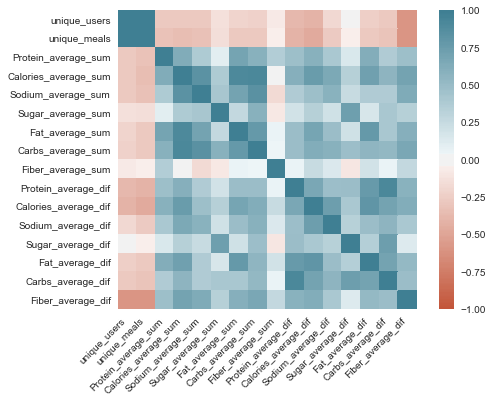

In [42]:
corr = daysta[daysta.columns[daysta.columns != 'clusters']].corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

In [43]:
daysta

,unique_dates,unique_users,unique_meals,Protein_average_sum,Calories_average_sum,Sodium_average_sum,Sugar_average_sum,Fat_average_sum,Carbs_average_sum,Fiber_average_sum,Protein_average_dif,Calories_average_dif,Sodium_average_dif,Sugar_average_dif,Fat_average_dif,Carbs_average_dif,Fiber_average_dif,clusters
0,2014-09-14,56,58,6.245841,136.231054,215.721612,6.989051,5.641176,13.127119,1.345013,58.267857,693.482143,676.178571,21.946429,26.785714,87.678571,10.142857,0
1,2014-09-15,280,223,6.949937,126.001244,181.622967,5.273216,4.787349,12.824839,1.381949,51.350000,596.467857,651.171429,25.589286,26.821429,79.975000,7.239286,0
2,2014-09-16,279,246,7.175121,128.075840,183.375952,4.897581,4.616700,13.330020,1.502986,47.451613,553.010753,644.118280,22.254480,23.992832,75.258065,6.917563,0
3,2014-09-17,274,253,7.279987,132.674687,185.938706,4.899329,4.967643,13.420027,1.529973,50.481752,550.788321,648.401460,22.259124,25.536496,71.854015,7.737226,0
4,2014-09-18,382,328,6.989593,127.458098,183.888365,4.790323,4.833859,13.187240,1.643258,47.141361,519.246073,640.293194,19.709424,24.845550,69.243455,7.638743,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,2015-04-05,515,271,6.921683,141.279944,187.666964,4.733155,5.415024,13.658904,1.437257,58.079612,660.137864,826.499029,23.683495,27.052427,89.520388,7.452427,0
204,2015-04-06,574,341,6.846955,117.933080,165.196948,4.474334,4.511377,12.123652,1.569868,53.689895,643.672474,736.179443,21.113240,25.165505,80.905923,6.916376,0
205,2015-04-07,351,223,6.975521,117.602647,163.284166,4.382934,4.545600,12.103809,1.720886,49.811966,610.327635,808.908832,21.458689,25.279202,83.658120,6.381766,0
206,2015-04-08,132,90,6.832445,116.566238,157.385554,4.169051,4.736802,11.833466,1.832423,54.030303,708.477273,826.106061,21.257576,25.803030,86.848485,5.659091,0


In [66]:
data.head(1)

,unique_foods,input_number,avg_daily_food,avg_proportions_diff,Protein_positive_difference,Protein_negative_difference,Protein_none_difference,Calories_positive_difference,Calories_negative_difference,Calories_none_difference,...,Fat_negative_difference,Fat_none_difference,Carbs_positive_difference,Carbs_negative_difference,Carbs_none_difference,Fiber_positive_difference,Fiber_negative_difference,Fiber_none_difference,clusters,dates_list
0,0.114504,0.925134,0.077578,0.443833,0.25,0.697802,0.005556,0.306452,0.716049,0.0,...,0.587571,0.010989,0.854839,0.079545,0.0,0.0,0.0,0.930108,0,"[""2014-09-15"", ""2014-09-16"", ""2014-09-17"", ""20..."


In [48]:
data['dates_list'] = dates

In [73]:
def get_dates_list(data, i):
    return json.loads(data.loc[i, 'dates_list'])

In [74]:
def get_clusters_info(data, cluster, dictionary):
    df = data.loc[data.clusters == cluster, ['dates_list']]
    for i in df.index:
        dates_list = get_dates_list(data, i)
        for date in dates_list:
            dictionary[date] += 1

In [78]:
unique_dates = daysta['unique_dates']
clusters_info = [{} for _ in range(5)]
for cluster in range(0,5):
    for date in unique_dates:
        clusters_info[cluster][date] = 0
    get_clusters_info(data, cluster, clusters_info[cluster])

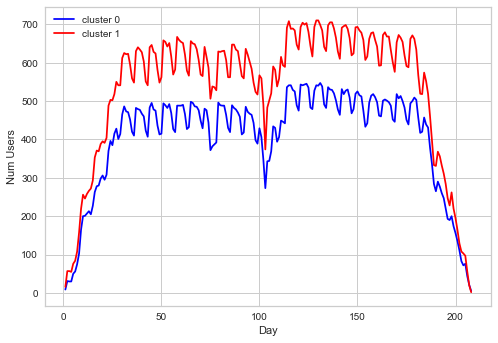

In [85]:
bla = [i for i in unique_dates]
blu = [clusters_info[2][i] for i in unique_dates]
ble = [clusters_info[4][i] for i in unique_dates]
plt.plot([i for i in range(1, 209)], blu, color='blue', label='cluster 0')
plt.plot([i for i in range(1, 209)], ble, color='red', label='cluster 1')
plt.ylabel('Num Users')
plt.xlabel('Day')
plt.legend()
plt.show()